# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [78]:

import pandas as pd

data = pd.read_csv('train.csv')

data.shape

(891, 12)

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [79]:
# Use this cell for your code
#data.info
data_clean = data.drop(columns=["PassengerId", "Name", "Ticket"])
data_clean.shape
data_clean.info

<bound method DataFrame.info of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]>

3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [80]:
# Use this cell for your code

data_clean["DeckLetter"]=data_clean["Cabin"].str.slice(stop=1)
data_clean=data_clean.drop(columns=["Cabin"])
data_clean.info

<bound method DataFrame.info of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked DeckLetter
0           0       3    male  22.0      1      0   7.2500        S        NaN
1           1       1  female  38.0      1      0  71.2833        C          C
2           1       3  female  26.0      0      0   7.9250        S        NaN
3           1       1  female  35.0      1      0  53.1000        S          C
4           0       3    male  35.0      0      0   8.0500        S        NaN
..        ...     ...     ...   ...    ...    ...      ...      ...        ...
886         0       2    male  27.0      0      0  13.0000        S        NaN
887         1       1  female  19.0      0      0  30.0000        S          B
888         0       3  female   NaN      1      2  23.4500        S        NaN
889         1       1    male  26.0      0      0  30.0000        C          C
890         0       3    male  32.0      0      0   7.7500        Q        NaN

[891 rows x 9 colum

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [82]:
# Use this cell for your code
from sklearn.preprocessing import LabelEncoder
#used this tutorialhttps://www.geeksforgeeks.org/machine-learning/ml-label-encoding-of-datasets-in-python/

le = LabelEncoder()

data_clean['DeckId'] = le.fit_transform(data_clean['DeckLetter'])
data_clean['EmbarkingId']=le.fit_transform(data_clean['Embarked'])
data_clean['SexId']=le.fit_transform(data_clean['Sex'])
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   DeckLetter   204 non-null    object 
 9   DeckId       891 non-null    int64  
 10  EmbarkingId  891 non-null    int64  
 11  SexId        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [83]:



# Use this cell for your code
#categorical: deck/deckID, sex/sexID, Embarked/EmbarkingId, Survived? no, Pclass? not sure, 
#continuous:Sibsp, Parch, Age,fare? ?

categorical=['Sex','DeckLetter','Embarked']
continuous=['Age','SibSp','Parch','Fare']
for col in continuous:
    data_clean[col]=data_clean[col].fillna(data_clean[col].mean())
for col in categorical:
    data_clean[col]=data_clean[col].fillna(data_clean[col].mode()[0])

print(data_clean.info())


#encoding again
le=LabelEncoder()
data_clean['SexId'] = le.fit_transform(data_clean['Sex'])
data_clean['DeckId'] = le.fit_transform(data_clean['DeckLetter']) 
data_clean['EmbarkingId'] = le.fit_transform(data_clean['Embarked'])


#should we remove the og categorical culumns after? 

#print("checking for null: ",data_test.isna()) all good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   DeckLetter   891 non-null    object 
 9   DeckId       891 non-null    int64  
 10  EmbarkingId  891 non-null    int64  
 11  SexId        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
None


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [49]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [84]:
# Use this cell for your code
data_test = data_clean.drop(columns=['Sex','DeckLetter','Embarked'])

data_test.to_csv('titanic_clean.csv', index=False) 
data_test.to_json('titanic_clean.json',orient="records")

print("\njson file preview:")
#import json
#result = data_test.head(2).to_dict('records')
#print(json.dumps(result, indent=2))



json file preview:


In [87]:
data = pd.read_csv('titanic_clean.csv')


print("first 20:")
print(data.head(20).to_string(index=False))

first 20:
 Survived  Pclass       Age  SibSp  Parch    Fare  DeckId  EmbarkingId  SexId
        0       3 22.000000      1      0  7.2500       2            2      1
        1       1 38.000000      1      0 71.2833       2            0      0
        1       3 26.000000      0      0  7.9250       2            2      0
        1       1 35.000000      1      0 53.1000       2            2      0
        0       3 35.000000      0      0  8.0500       2            2      1
        0       3 29.699118      0      0  8.4583       2            1      1
        0       1 54.000000      0      0 51.8625       4            2      1
        0       3  2.000000      3      1 21.0750       2            2      1
        1       3 27.000000      0      2 11.1333       2            2      0
        1       2 14.000000      1      0 30.0708       2            0      0
        1       3  4.000000      1      1 16.7000       6            2      0
        1       1 58.000000      0      0 26.5500     

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [88]:
# Use this cell for your code
categorical = ['Pclass', 'SexId', 'DeckId', 'EmbarkingId']
continuous = ['Age', 'SibSp', 'Parch', 'Fare']
data_clean=pd.read_csv('titanic_clean.csv')
modes = [data_clean[col].mode()[0] for col in categorical]
print("modes: \n",modes)
medians=[data_clean[col].median() for col in continuous]
print("median vals: \n",medians)

modes: 
 [np.int64(3), np.int64(1), np.int64(2), np.int64(2)]
median vals: 
 [np.float64(29.69911764705882), np.float64(0.0), np.float64(0.0), np.float64(14.4542)]


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [95]:
# Use this cell for your code
survivors=data_clean[data_clean['Survived']==1]
non_survivors=data_clean[data_clean['Survived']==0]

#summart stats: avg (median) and most frequent vals (mode?)
#so need sth for categorical and sth for continuous
avg_survivor=[]
avg_non_survivor=[]
for col in categorical:
    #mode
    survivors_categorical=survivors[col].mode()[0]
    nonsurvivors_categorical=non_survivors[col].mode()[0]
    avg_survivor.append(survivors_categorical)
    avg_non_survivor.append(nonsurvivors_categorical)
for col in continuous:
    survivors_continuous=survivors[col].median()
    nonsurvivors_continuous=non_survivors[col].median()
    avg_survivor.append(survivors_continuous)
    avg_non_survivor.append(nonsurvivors_continuous)

print("avg survivor",avg_survivor)
print("avg non survivor", avg_non_survivor)

avg survivor [np.int64(1), np.int64(0), np.int64(2), np.int64(2), np.float64(29.69911764705882), np.float64(0.0), np.float64(0.0), np.float64(26.0)]
avg non survivor [np.int64(3), np.int64(1), np.int64(2), np.int64(2), np.float64(29.69911764705882), np.float64(0.0), np.float64(0.0), np.float64(10.5)]


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>



ANSWER: 
from the graphs + counts, typical profile of a survivor would be 1st class, female, around 30 years old
non survivor: 3d class, male, around 30 years old 

from the avgs they represent some amount of the survivors/non survivors, 
5 exact matches for the survivors, 120 non survivors (used range -+5 for the age)

for the mismatched cases, found 47 survivors who looked like typical non survivors and 3 non survivors who looked like survivors (only took into consideration pclass and sexID

so the avg profiles identify key survival factors but not enough to conclude since theres a lot of differences within each group


pclass counts
Pclass
1    136
3    119
2     87
Name: count, dtype: int64

 Pclass
3    372
2     97
1     80
Name: count, dtype: int64
sexID counts
SexId
0    233
1    109
Name: count, dtype: int64

 SexId
1    468
0     81
Name: count, dtype: int64
deck counts
DeckId
2    241
1     35
3     25
4     24
5      8
0      7
6      2
Name: count, dtype: int64

 DeckId
2    505
1     12
4      8
0      8
3      8
5      5
6      2
7      1
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

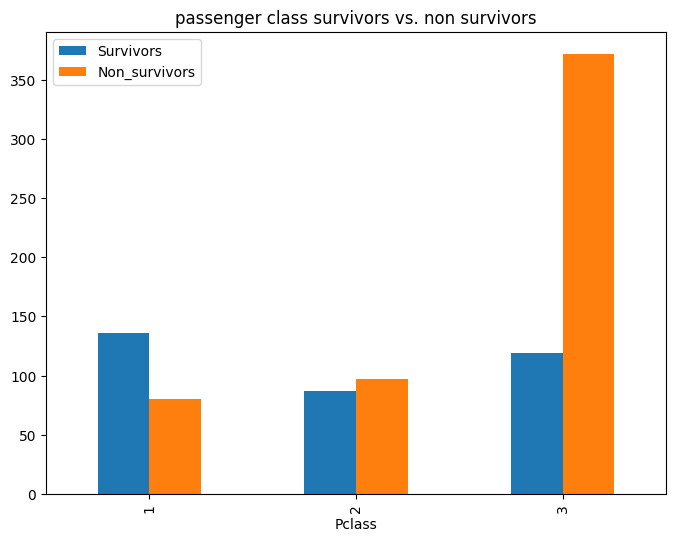

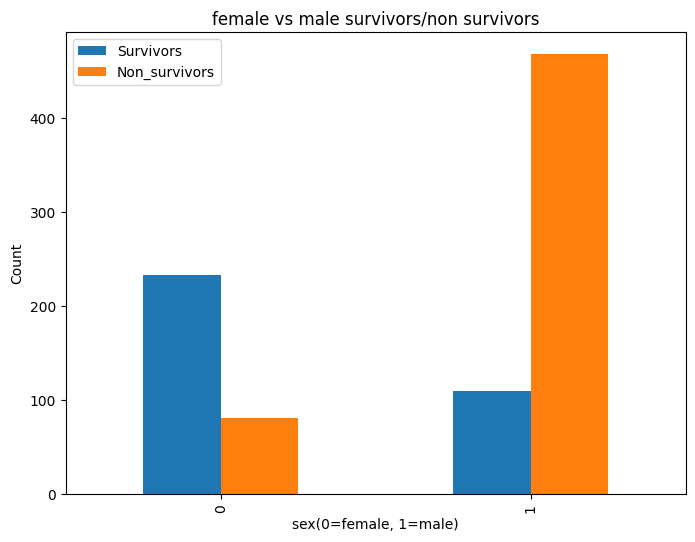

survivors count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

non survivors count    549.000000
mean      30.415100
std       12.457370
min        1.000000
25%       23.000000
50%       29.699118
75%       35.000000
max       74.000000
Name: Age, dtype: float64


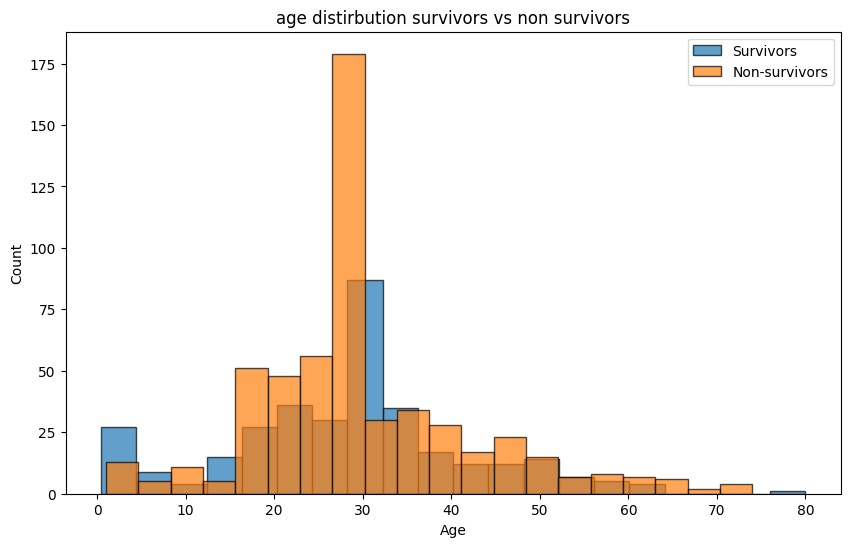

avg survivor profile: [np.int64(1), np.int64(0), np.int64(2), np.int64(2), np.float64(29.69911764705882), np.float64(0.0), np.float64(0.0), np.float64(26.0)]
avg non survivor profile [np.int64(3), np.int64(1), np.int64(2), np.int64(2), np.float64(29.69911764705882), np.float64(0.0), np.float64(0.0), np.float64(10.5)]
testing some survivors with the pattern against the avg: 5
     Survived  Pclass        Age  SibSp  Parch      Fare  DeckId  EmbarkingId  \
256         1       1  29.699118      0      0   79.2000       2            0   
290         1       1  26.000000      0      0   78.8500       2            2   
306         1       1  29.699118      0      0  110.8833       2            0   
537         1       1  30.000000      0      0  106.4250       2            0   
842         1       1  30.000000      0      0   31.0000       2            0   

     SexId  
256      0  
290      0  
306      0  
537      0  
842      0  
testing non-survivors now: 120
    Survived  Pclass      

In [127]:
# Use this cell for your code
#gonnause graphs
import matplotlib.pyplot as plt

print("pclass counts")
print(survivors['Pclass'].value_counts())
print('\n',non_survivors['Pclass'].value_counts())
#more survivors in first class, most ppl who diditn survive were in 3rd class 

print("sexID counts")
print(survivors['SexId'].value_counts()) #1 is male, 0 is female
print('\n',non_survivors['SexId'].value_counts())
#more women among survivors than males 
#most ppl who didnt survive were male 

print("deck counts")
print(survivors['DeckId'].value_counts())
print('\n',non_survivors['DeckId'].value_counts())
#most non survivors were in deck 2 
#most survivors were also in deck 2 ? 


#some graphs for the categorical vals:
plt.figure(figsize=(8,6))
pclass_comparison = pd.DataFrame({
    'Survivors': survivors['Pclass'].value_counts().sort_index(),
    'Non_survivors': non_survivors['Pclass'].value_counts().sort_index()
})
pclass_comparison.plot(kind='bar', figsize=(8, 6))
plt.title('passenger class survivors vs. non survivors')
plt.show()

sex_comparison = pd.DataFrame({
    'Survivors': survivors['SexId'].value_counts().sort_index(),
    'Non_survivors': non_survivors['SexId'].value_counts().sort_index()
})
sex_comparison.plot(kind='bar', figsize=(8, 6))
plt.title('female vs male survivors/non survivors')
plt.xlabel('sex(0=female, 1=male)')
plt.ylabel('Count')
plt.show()

#contunuous 
#used claude for the overlapping histograms
print("survivors",survivors['Age'].describe())
print("\nnon survivors",non_survivors['Age'].describe())
plt.figure(figsize=(10, 6))
plt.hist(survivors['Age'], alpha=0.7, edgecolor='black',label='Survivors', bins=20)
plt.hist(non_survivors['Age'], alpha=0.7, edgecolor='black',label='Non-survivors', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('age distirbution survivors vs non survivors')
plt.legend()
plt.show()


#print some people with that profile, see if they match the avg survivors 
#same thing for non survivors
print("avg survivor profile:",avg_survivor)
print("avg non survivor profile", avg_non_survivor)

test_survivors = survivors[(survivors['Pclass']==avg_survivor[0])&(survivors['SexId']==avg_survivor[1])
    &(survivors['DeckId']==avg_survivor[2]) &
    (survivors['Age'] >= avg_survivor[4] - 5) & (survivors['Age'] <= avg_survivor[4] + 5) &
    (survivors['SibSp']==avg_survivor[5]) &
    (survivors['Parch']==avg_survivor[6])]
print("testing some survivors with the pattern against the avg:", len(test_survivors))
print(test_survivors.head())

test_non_survivors = non_survivors[
    (non_survivors['Pclass']==avg_non_survivor[0]) & 
    (non_survivors['SexId']==avg_non_survivor[1])&(non_survivors['DeckId']==avg_non_survivor[2]) &
    (non_survivors['Age'] >= avg_non_survivor[4] - 5) & (non_survivors['Age'] <= avg_non_survivor[4] + 5) &
    (non_survivors['SibSp']==avg_non_survivor[5]) &
    (non_survivors['Parch']==avg_non_survivor[6])
]
print("testing non-survivors now:", len(test_non_survivors))
print(test_non_survivors.head())



#mismatching 
mismatch_survivor=survivors[(survivors['Pclass']==avg_non_survivor[0]) & (survivors['SexId']==avg_non_survivor[1])]
print("amount of survivors who look like avg non survivor : ",len(mismatch_survivor))
mismatch_non_survivor=non_survivors[(non_survivors['Pclass']==avg_survivor[0])&(non_survivors['SexId']==avg_survivor[1])]
print("non survivors who look like avg survivor : ",len(mismatch_non_survivor))


4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

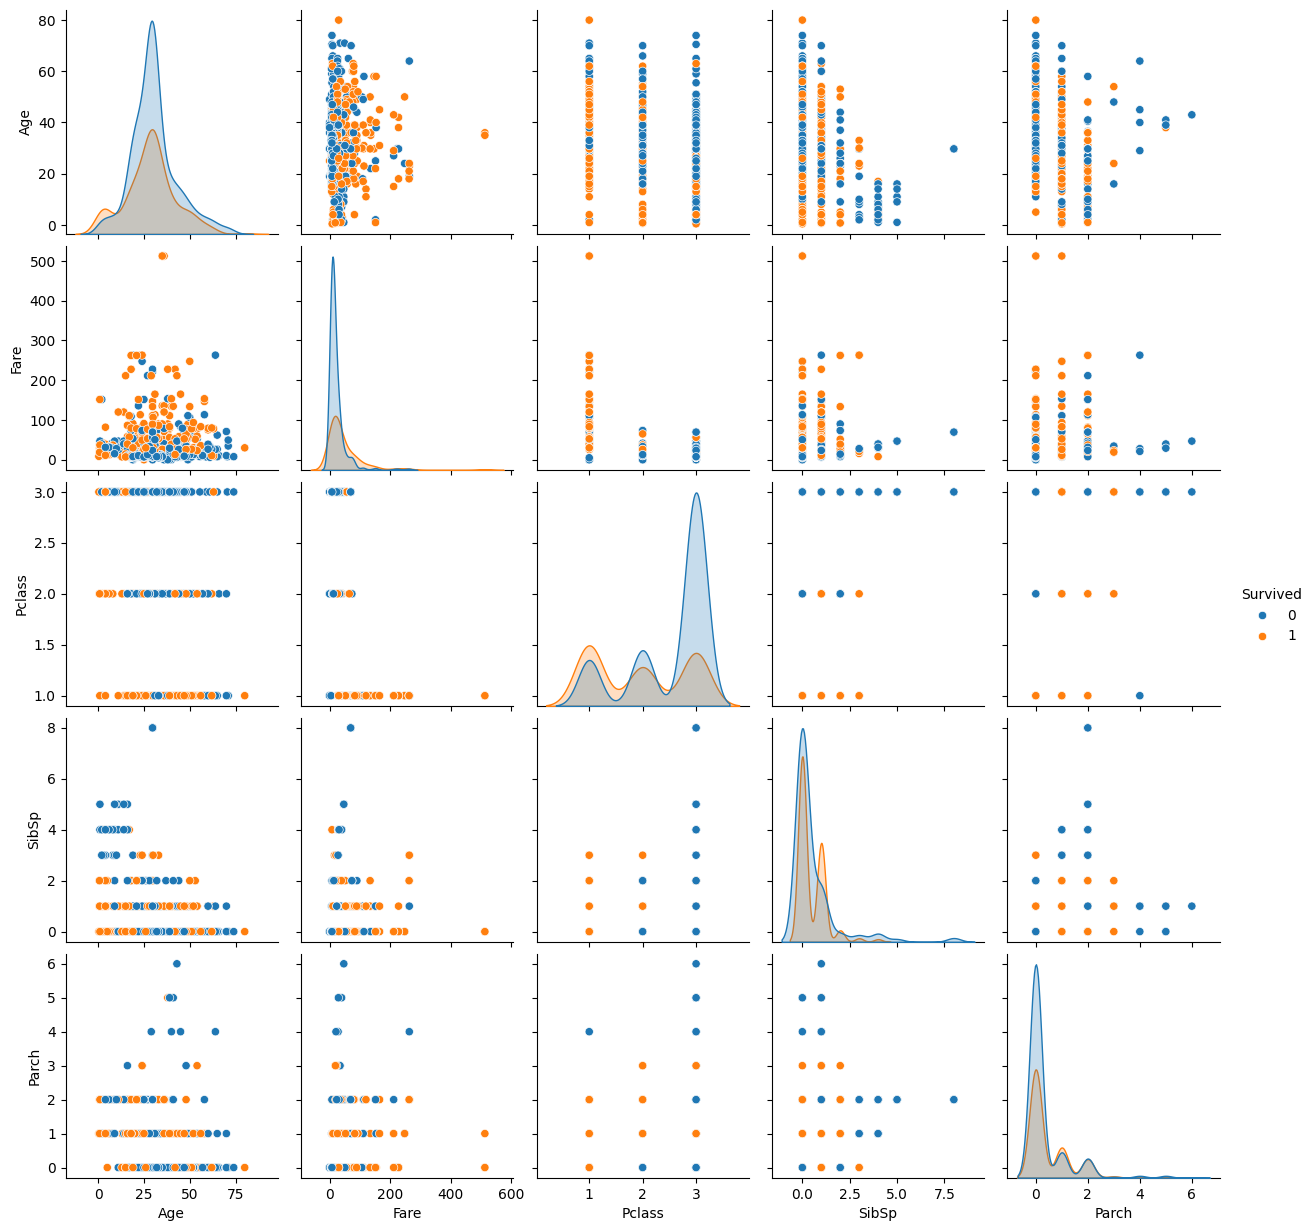

In [134]:
# Use this cell for your code
import seaborn as sns 
plot_data = data_clean[['Age','Fare','Pclass','SibSp','Parch','Survived']]
sns.pairplot(plot_data,hue="Survived")
plt.show()


5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*

with imputation we could keep more data entries for for example passengers who had missing details but still some other valuable information so we had an overall more representative sample. downside is that this impacted the age variable bc we have the identical mean of around 29,6-7 which gives us less information abt the pattern of the age of the survivors

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

ANSWER:
Not rlly a lot of negative/positive sentiment words expressed, more so abt the products so ppl in reviews describe products/usage more than their feelings about it 

In [138]:
# Use this cell for your code
#from thishttps://stackoverflow.com/questions/45822827/how-to-count-the-most-commonly-used-words-in-a-text-file
from collections import Counter
with open("pos.txt","r") as file:
    pos_count=Counter(word for line in file for word in line.split())    
with open("neg.txt","r") as file:
    neg_count=Counter(word for line in file for word in line.split())

print("most common positive words: ",pos_count.most_common(15))
print("most common negative",neg_count.most_common(15))





most common positive words:  [('great', 435913), ('work', 427783), ('use', 345424), ('good', 291447), ('fit', 273504), ('instal', 229463), ('product', 210088), ('look', 181409), ('just', 180420), ('like', 175728), ('easi', 162869), ('light', 147322), ('car', 147204), ('price', 144896), ('need', 136526)]
most common negative [('work', 39998), ('use', 37261), ('fit', 31296), ('product', 24395), ('just', 23581), ('light', 22907), ('like', 20685), ('time', 19666), ('look', 18825), ('instal', 18710), ('did', 18447), ('good', 17296), ('dont', 17136), ('buy', 16885), ('car', 16695)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [13]:
# Use this cell for your code

3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [14]:
# Use this cell for your code

4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

In [15]:
# Use this cell for your code

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**

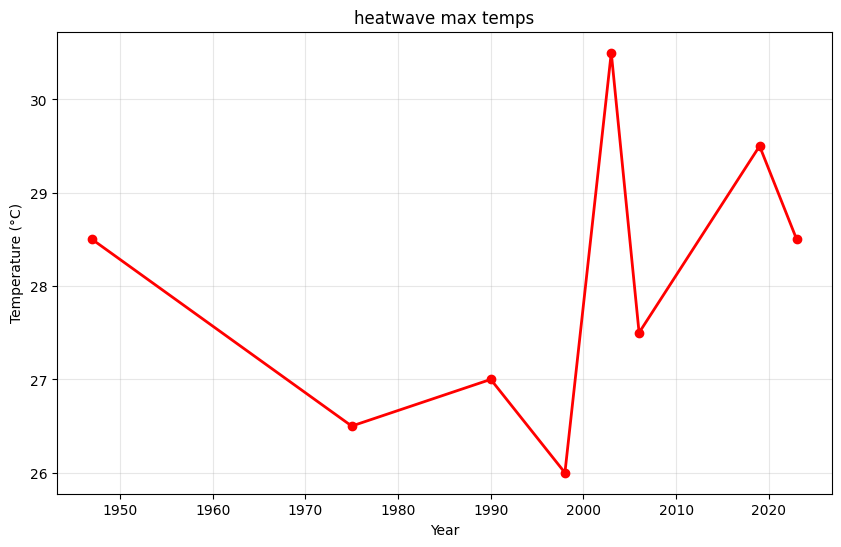

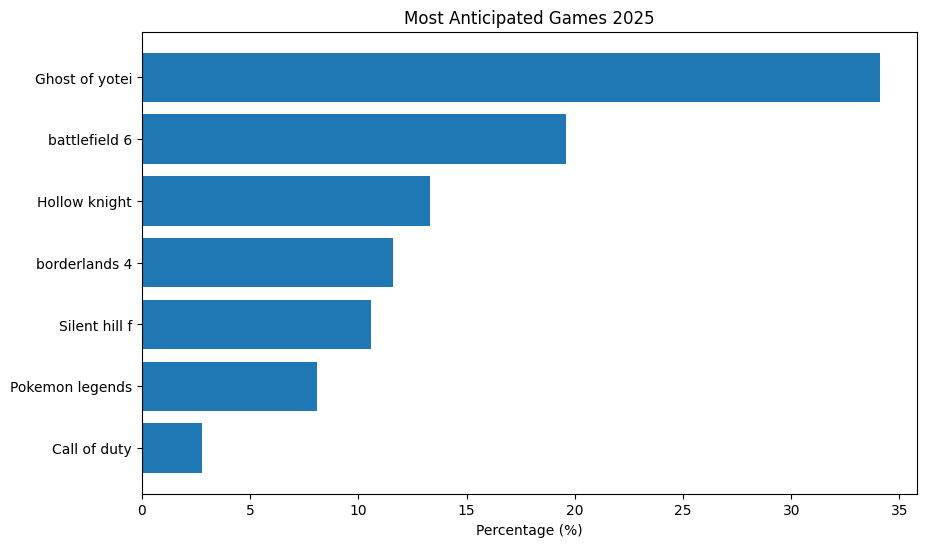

In [141]:
#meteo france
years = [1947, 1975, 1990, 1998, 2003, 2006, 2019, 2023]
temps = [28.5, 26.5, 27.0, 26, 30.5, 27.5, 29.5, 28.5] #approx

plt.figure(figsize=(10, 6))
plt.plot(years, temps, 'o-', color='red', linewidth=2, markersize=6)
plt.title('heatwave max temps')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.show()


#ign
games = ['Ghost of yotei', 'battlefield 6', 'Hollow knight', 'borderlands 4', 
         'Silent hill f', 'Pokemon legends', 'Call of duty']
percentages = [34.1, 19.6, 13.3, 11.6, 10.6, 8.1, 2.8]
plt.figure(figsize=(10, 6))
plt.barh(games, percentages)
plt.title('Most Anticipated Games 2025')
plt.xlabel('Percentage (%)')
plt.gca().invert_yaxis()
plt.show()

 
#stack overflow pogramming languages
languages = ['JavaScript', 'Python', 'TypeScript', 'Java', 'C#']
current = [65, 49, 38, 30, 27]
want = [15, 26, 16, 8, 11]

